In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

/kaggle/input/amazon-prime-tv-shows/Prime TV Shows Data set.csv


In [7]:
# Reading the data set
tv_shows = pd.read_csv("https://raw.githubusercontent.com/benvictoria21/pandas/master/dataset/datasets_724030_1277618_Prime%20TV%20Shows%20Data%20set.csv",encoding="iso-8859-1")

In [9]:
tv_shows.shape

(503, 8)

In [11]:
tv_shows.head(3)

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020,1,Hindi,Drama,7.5,18+
1,2,Upload,2020,1,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017,3,English,"Drama, Comedy",8.7,16+


In [12]:
tv_shows.dtypes

S.no.                        int64
Name of the show            object
Year of release              int64
No of seasons available      int64
Language                    object
Genre                       object
IMDb rating                float64
Age of viewers              object
dtype: object

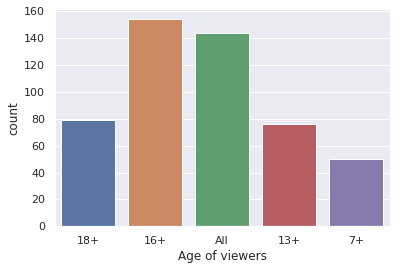

In [13]:
# Looking at the age of viewers
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x = "Age of viewers", data = tv_shows)

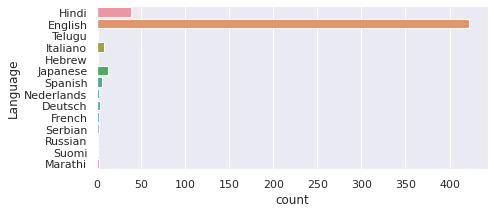

In [14]:
# Let us take a look at the languages in which TV shows are being offered
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y = "Language", data = tv_shows)

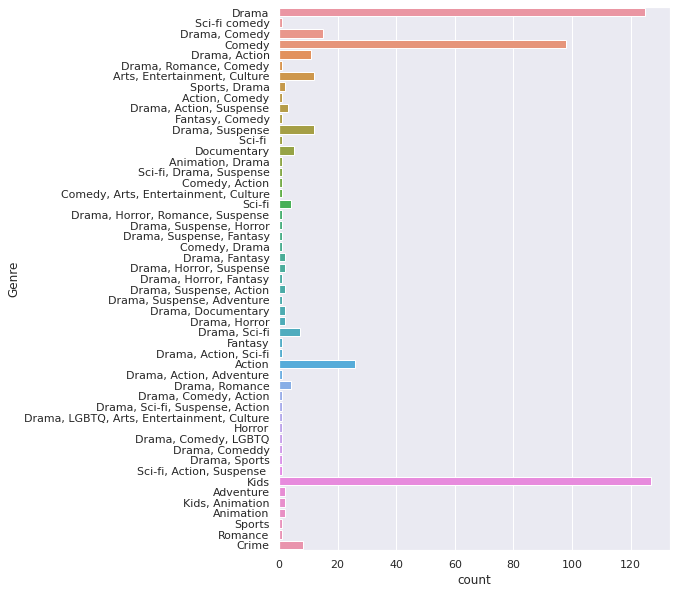

In [15]:
# Let us take a look at the genres of the TV shows
f, ax = plt.subplots(figsize=(7, 10))
sns.countplot(y = "Genre", data = tv_shows)

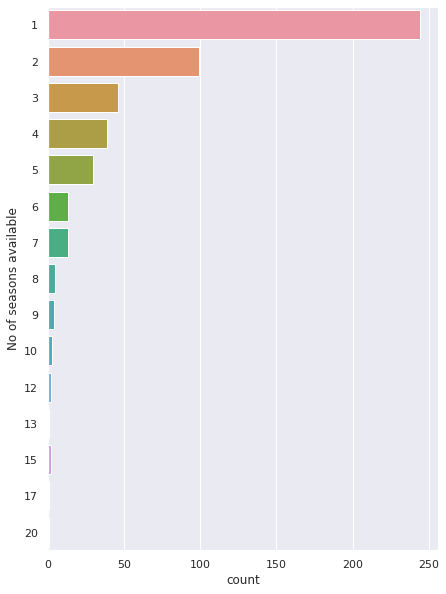

In [16]:
# Let us take a look at how many seasons of the show are available on Prime
f, ax = plt.subplots(figsize=(7, 10))
sns.countplot(y = "No of seasons available", data = tv_shows)

In [17]:
# Let us now check for missing values
tv_shows.isnull().sum()

S.no.                        0
Name of the show             0
Year of release              0
No of seasons available      0
Language                     0
Genre                        0
IMDb rating                283
Age of viewers               0
dtype: int64

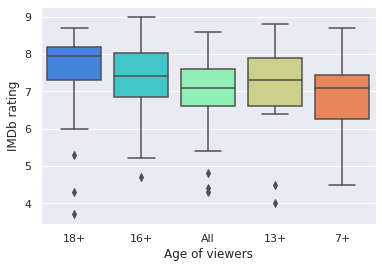

In [18]:
# Checking for outliers
sns.boxplot(x ='Age of viewers',y = 'IMDb rating',data = tv_shows,palette ='rainbow')

In [19]:
# Replace using median 
median = tv_shows['IMDb rating'].median()
tv_shows['IMDb rating'].fillna(median, inplace=True)

In [20]:
tv_shows.isnull().sum()

S.no.                      0
Name of the show           0
Year of release            0
No of seasons available    0
Language                   0
Genre                      0
IMDb rating                0
Age of viewers             0
dtype: int64

In [21]:
# Let us take a look at the top 20 high rated shows on Amazon Prime
tv_shows.sort_values(by = "IMDb rating", ascending = False).head(20)

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
20,21,The Test: A New Era for Australia's Team,2020,1,English,Documentary,9.0,16+
281,282,Seinfeld,1990,9,English,Comedy,8.8,13+
49,50,Downtown Abbey,2010,6,English,Drama,8.7,7+
2,3,The Marvelous Mrs. Maisel,2017,3,English,"Drama, Comedy",8.7,16+
37,38,Hostel Daze,2019,1,Hindi,"Drama, Comedy",8.7,16+
4,5,Fleabag,2016,2,English,Comedy,8.7,18+
340,341,The Grand Tour,2017,4,English,Sports,8.7,16+
51,52,This is Us,2017,3,English,Drama,8.7,16+
12,13,The Boys,2019,1,English,"Action, Comedy",8.7,18+
40,41,Dexter,2006,8,English,Drama,8.6,18+


In [22]:
# Let us now take a look at 20 worst rated shows
tv_shows.sort_values(by = "IMDb rating", ascending = True).head(20)

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
367,368,Ilana Glazer: The Planet is Burning,2020,1,English,Comedy,3.7,18+
162,163,Tokyo Alice,2019,1,Japanese,Drama,4.0,13+
243,244,Skulls and Roses,2019,1,Hindi,Action,4.3,18+
428,429,L.O.L Surprise,2019,1,English,Kids,4.3,All
413,414,Wishenpoof,2015,4,English,Kids,4.4,All
375,376,Businessmen VS Aliens,2018,1,Japanese,Comedy,4.5,13+
430,431,Alvin and the Chipmunks,2017,4,English,Kids,4.5,7+
317,318,Alice Wettlund: My Mama is a Human and So Am I,2019,1,English,Comedy,4.7,16+
466,467,Strawberry Shortcake,2003,1,English,Kids,4.8,All
473,474,G.I. Joe Sigma Six,2006,1,English,Kids,4.9,7+


In [23]:
top_english = tv_shows[tv_shows['Language'] == 'English'].sort_values(by = 'IMDb rating',ascending = False)
#Top 10 TV shows in english
top_english.head(10)

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
20,21,The Test: A New Era for Australia's Team,2020,1,English,Documentary,9.0,16+
281,282,Seinfeld,1990,9,English,Comedy,8.8,13+
4,5,Fleabag,2016,2,English,Comedy,8.7,18+
51,52,This is Us,2017,3,English,Drama,8.7,16+
49,50,Downtown Abbey,2010,6,English,Drama,8.7,7+
2,3,The Marvelous Mrs. Maisel,2017,3,English,"Drama, Comedy",8.7,16+
340,341,The Grand Tour,2017,4,English,Sports,8.7,16+
12,13,The Boys,2019,1,English,"Action, Comedy",8.7,18+
105,106,Mad Men,2007,7,English,Drama,8.6,16+
436,437,Tumble Leaf,2014,6,English,Kids,8.6,All


In [24]:
# Top 10 TV shows in Hindi
top_hindi = tv_shows[tv_shows['Language'] == 'Hindi'].sort_values(by = 'IMDb rating',ascending = False)
#Top 10 TV shows in hindi
top_hindi.head(10)

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
37,38,Hostel Daze,2019,1,Hindi,"Drama, Comedy",8.7,16+
8,9,The Family Man,2019,1,Hindi,"Drama, Action",8.6,18+
7,8,Mirzapur,2018,1,Hindi,Drama,8.5,18+
16,17,Breathe,2018,1,Hindi,"Drama, Suspense",8.4,16+
5,6,Made in Heaven,2019,1,Hindi,Drama,8.3,18+
299,300,Best of AIB,2014,1,Hindi,Comedy,8.2,16+
11,12,Inside Edge,2017,2,Hindi,"Sports, Drama",8.0,18+
17,18,The Forgotten Army- Azaadi ke Liye,2020,1,Hindi,"Drama, Action",8.0,18+
83,84,Bang Baaja Baaraat,2015,1,Hindi,Drama,8.0,18+
0,1,Pataal Lok,2020,1,Hindi,Drama,7.5,18+


In [25]:
# Top 10 TV shows in the genre: 'Drama'
top_drama = tv_shows[tv_shows['Genre'] == 'Drama'].sort_values(by = 'IMDb rating',ascending = False)
#Top 10 TV shows in drama
top_drama.head(10)

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
51,52,This is Us,2017,3,English,Drama,8.7,16+
49,50,Downtown Abbey,2010,6,English,Drama,8.7,7+
105,106,Mad Men,2007,7,English,Drama,8.6,16+
40,41,Dexter,2006,8,English,Drama,8.6,18+
85,86,The Handmaid's Tale,2017,3,English,Drama,8.5,18+
7,8,Mirzapur,2018,1,Hindi,Drama,8.5,18+
28,29,Suits,2011,8,English,Drama,8.5,16+
76,77,Bosch,2015,6,English,Drama,8.4,18+
142,143,Ray Donovan,2013,6,English,Drama,8.3,All
154,155,Life,2007,2,English,Drama,8.3,All


In [26]:
# Top 10 TV shows in the genre: 'Comedy'
top_comedy = tv_shows[tv_shows['Genre'] == 'Comedy'].sort_values(by = 'IMDb rating',ascending = False)
#Top 10 TV shows in comedy
top_comedy.head(10)

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
281,282,Seinfeld,1990,9,English,Comedy,8.8,13+
4,5,Fleabag,2016,2,English,Comedy,8.7,18+
261,262,Mr. Bean,1995,1,English,Comedy,8.5,16+
293,294,Californication,2007,7,English,Comedy,8.3,18+
299,300,Best of AIB,2014,1,Hindi,Comedy,8.2,16+
330,331,EIC vs The World,2017,1,English,Comedy,8.0,16+
312,313,Trial and Error,2017,2,English,Comedy,8.0,13+
374,375,Hitoshi Matsumoto Presents Documental,2018,3,Japanese,Comedy,8.0,18+
315,316,Red Oaks,2015,3,English,Comedy,7.9,18+
347,348,People of Earth,2016,2,English,Comedy,7.7,All


In [27]:
# Top 10 TV shows in the genre: 'Kids'
top_kids = tv_shows[tv_shows['Genre'] == 'Kids'].sort_values(by = 'IMDb rating',ascending = False)
#Top 10 TV shows for kids
top_kids.head(10)

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
436,437,Tumble Leaf,2014,6,English,Kids,8.6,All
296,297,Munki and Trunk,2016,1,English,Kids,8.4,All
452,453,Jessy and Nessy,2020,1,English,Kids,8.3,All
411,412,Gortimer Gibbon's Life on Normal Street,2015,3,English,Kids,8.2,All
405,406,Just Add Magic,2016,5,English,Kids,8.2,All
437,438,Wolverine and the X-men,2016,1,English,Kids,8.0,7+
421,422,Dexter's Laboratory,1997,5,English,Kids,7.9,All
423,424,Transformers Prime,2012,3,English,Kids,7.8,7+
226,227,Lost in Oz,2017,2,English,Kids,7.7,7+
450,451,Niko and The Sword of Light,2017,3,English,Kids,7.7,All


In [28]:
# Let us now look at the top 10 best shows released this year which are a must watch
top10 = tv_shows[tv_shows['Year of release'] == 2020].sort_values(by ='IMDb rating',ascending = False)
#Top 10 TV shows of 2020
top10.head(10)

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
20,21,The Test: A New Era for Australia's Team,2020,1,English,Documentary,9.0,16+
452,453,Jessy and Nessy,2020,1,English,Kids,8.3,All
1,2,Upload,2020,1,English,Sci-fi comedy,8.1,16+
17,18,The Forgotten Army- Azaadi ke Liye,2020,1,Hindi,"Drama, Action",8.0,18+
73,74,Star Trek: Picard,2020,1,English,Sci-fi,7.6,18+
0,1,Pataal Lok,2020,1,Hindi,Drama,7.5,18+
19,20,Tales from the Loop,2020,1,English,Sci-fi,7.5,18+
493,494,Learning with Anima Cars,2020,1,English,Kids,7.4,All
492,493,Shark Academy: Nursery Rhymes for Kids,2020,1,English,Kids,7.4,All
339,340,Zoe Coombs Marr: Bossy Bottom,2020,1,English,Comedy,7.4,18+


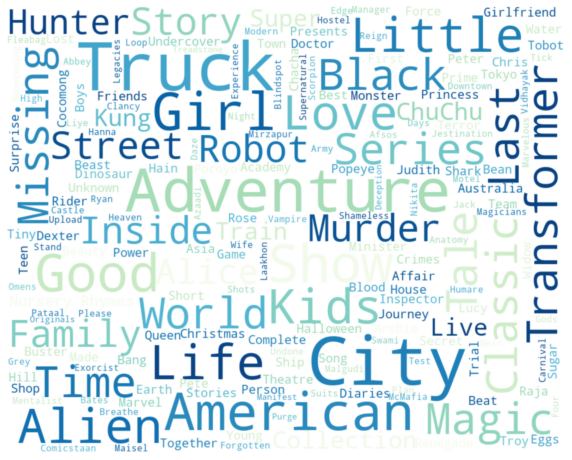

In [29]:
# Visualizing the most used words in the names of the TV shows
common_words = tv_shows['Name of the show'] 
word_cloud = WordCloud(width = 1000,
                       height = 800,
                       colormap = 'GnBu', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "white").generate(" ".join(common_words))

plt.figure(figsize = (10, 15))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()